<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

# Loading (and saving) data from frequently used sources

This Jupyter Notebook provides examples of how to read in data from a variety of frequently used data-types, as well as how to save the datasets into said file-types. 

This Notebook provides examples for the most common use-cases, requiring only pandas and openpyxl to be installed (for Excel). Another notebook will be created for more advanced data formats, often requiring other packages. The data formats listed in 'red' below, will be covered in a future 'advanced' Notebook

For tabular data, we will use the functionality pandas out of the box, for tabular data stored in: 
* <a href="#csv">csv</a>, <a href="#txt">txt</a>, <a href="#excel">Excel</a>, <font color='red'>SQL</font>, <font color='red'>parquet</font>

Some of these are enhanced through additional libraries that need to be installed (that pandas relies on). More information is provided in the corresponding section.

Configurations are often stored in formats suitable to be read into Dictionaries, and common file types include:

* <a href="#json">json</a>, <font color='red'>yaml</font>

Lastly, to load and save more complicates objects, Python provides additional serialization options such as:

* <a href="#pickle">pickle</a>, <font color='red'>pmml (e.g. for cross-platform ML models)</font>

**Note: When pandas will automatically attempt to detect the data type in each column. If the data has a large number of rows, pandas will throw a warning, and you can set 'low_memory=False' to tell pandas to read in the entire file before determining the data type, or you can manually specify data type using the dtype. See the tips and tricks section of this Notebook**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<ul class="toc-item"><li><span><a href="#Loading-(and-saving)-data-from-frequently-used-sources" data-toc-modified-id="Loading-(and-saving)-data-from-frequently-used-sources-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading (and saving) data from frequently used sources</a></span></li><li><span><a href="#Load-and-Save-CSV-data" data-toc-modified-id="Load-and-Save-CSV-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and Save CSV data</a></span></li><li><span><a href="#Load-and-Save-TXT-data" data-toc-modified-id="Load-and-Save-TXT-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load and Save TXT data</a></span></li><li><span><a href="#Load-and-Save-Excel-data" data-toc-modified-id="Load-and-Save-Excel-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load and Save Excel data</a></span></li><li><span><a href="#Read-and-write-from-json" data-toc-modified-id="Read-and-write-from-json-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Read and write from json</a></span></li><li><span><a href="#Read-and-write-a-pickle-file" data-toc-modified-id="Read-and-write-a-pickle-file-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Read and write a pickle file</a></span></li><li><span><a href="#Tips-and-Tricks" data-toc-modified-id="Tips-and-Tricks-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Tips and Tricks</a></span><ul class="toc-item"><li><span><a href="#Get-the-latest-file-within-a-folder-based-on-time-stamp" data-toc-modified-id="Get-the-latest-file-within-a-folder-based-on-time-stamp-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Get the latest file within a folder based on time-stamp</a></span></li><li><span><a href="#Selecting-which-characters-that-pandas-should-detect-as-Missing" data-toc-modified-id="Selecting-which-characters-that-pandas-should-detect-as-Missing-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Selecting which characters that pandas should detect as Missing</a></span></li><li><span><a href="#Using-dtype-and-parse_dates-to-specify-data-type-of-each-column" data-toc-modified-id="Using-dtype-and-parse_dates-to-specify-data-type-of-each-column-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Using dtype and parse_dates to specify data type of each column</a></span></li><li><span><a href="#Using-dtype-=-object-to-avoid-any-data-casting-by-pandas" data-toc-modified-id="Using-dtype-=-object-to-avoid-any-data-casting-by-pandas-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Using dtype = object to avoid any data casting by pandas</a></span></li><li><span><a href="#Reading-csv-from-URLs" data-toc-modified-id="Reading-csv-from-URLs-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Reading csv from URLs</a></span></li><li><span><a href="#Reading-tables-from-HTML" data-toc-modified-id="Reading-tables-from-HTML-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Reading tables from HTML</a></span></li></ul></li></ul>

<a id="csv"></a>
# Load and Save CSV data

This uses the read_csv and to_csv capabilities in pandas:
* https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [1]:
# Load in required packages
import pandas as pd

In [2]:
data_from_csv = pd.read_csv("sample_input/iris.csv", low_memory=False) # For small datasets, low_memory=False is not necessary

In [3]:
data_from_csv.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
# Save into CSV
data_from_csv.to_csv("sample_output/iris.csv", index=False) 
# index=False prevents the 'index' (01,2,3,4...) to be saved as the first column in the csv

<a id="txt"></a>
# Load and Save TXT data

This can still use the csv functionality! But you will need to specify the separator (if it is not comma-separated):
* https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html


In [5]:
# Load in required packages
import pandas as pd

In [6]:
# This file is tab-separated
data_from_txt = pd.read_csv("sample_input/iris_tab_separated.txt", sep='\t')

In [7]:
data_from_txt.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
# Save into TXT. In this example, we save it as a semi-colon separated file
data_from_txt.to_csv("sample_output/iris_semicolon_separated.txt", sep=';', index=False)
# index=False prevents the 'index' (01,2,3,4...) to be saved as the first column in the txt

<a id="excel"></a>
# Load and Save Excel data

This reads in an Excel file, using pandas:
* https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html

This can be used to read in from specific tabs and cells/ranges within Excel. This makes use of additional Python packages built to handle Excel input/output (such as openpyxl, odf, pyxlsb) -- see the 'Engine' argument in the link above. By default, it will use openpyxl. Do not use 'xlrd', as it only works with the old 'xls' format


In [9]:
# Load in required packages
import pandas as pd
import openpyxl

In [10]:
# This writes and saves the data into a single tab Excel, where the data starts in cell A1, similar to reading in a CSV
data_from_excel = pd.read_excel("sample_input/iris_single_tab.xlsx")

In [11]:
# This saves the data into a single tab Excel starting in cell A1
data_from_excel.to_excel("sample_output/iris_single_tab.xlsx",index=False)

With Excel files, there is a lot of flexibility for where data is stored and formatted. The following provides an example where data from the second tab of an Excel is read in, and a two-tab Excel is created.

To write multiple tabs into an Excel using pandas, the ExcelWriter functionality is needed to create the Excel
https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html

In [12]:
# Data is stored in the second tab, named "iris", 
# with headers starting in B3 going left to right, and data starting in B5 going left to right

data_from_excel_2 = pd.read_excel("sample_input/iris_multi_tab.xlsx",
                                  sheet_name = "iris",
                                  index_col = None, # No index column
                                  skiprows = [0, 1,3], # No data in first, second, fourth rows
                                  usecols=lambda x: 'Unnamed' not in x # Skip blank columns
                                 )

data_from_excel_2.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [13]:
# Create a blank Excel file with two tabs.

writer = pd.ExcelWriter('sample_output/iris_multi_tab.xlsx', engine='openpyxl')

# Populate the first tab description: Text stored in a dataframe
pd.DataFrame({"Description":["Hello World"]}).T.to_excel(writer,
                                                         sheet_name = "Description",
                                                         index=True,
                                                         header=False,
                                                         startrow = 1,
                                                         startcol = 2
                                                        )

# Then populate a second tab with the data
data_from_excel_2.to_excel(writer,
                                 sheet_name = "Data",
                                 index=False,
                                 header=True,
                                 startrow = 1,
                                 startcol = 2
                                )


# Save
writer.close()

<a id="json"></a>
# Read and write from json

Python has a built in package called json for writing and reading json files. Refer to: https://docs.python.org/3/library/json.html

In [14]:
import json

In [15]:
# Opening JSON file
with open('sample_input/example_json.json') as file:
    
    # returns JSON object as a dictionary
    json_data = json.load(file)
    
json_data

{'Name': 'Test',
 'Mobile': 12345678,
 'Boolean': True,
 'Pets': ['Dog', 'cat'],
 'Address': {'Permanent address': 'USA', 'current Address': 'AU'}}

In [16]:
# Write json files
with open('sample_output/example_json.json', 'w') as file:  # The 'w' is for 'write'
    json_string = json.dumps(json_data)
    
    file.write(json_string)

<a id="pickle"></a>
# Read and write a pickle file

pickle is Python's native method for serializing objects, allowing you to store virtually any objects: https://docs.python.org/3/library/pickle.html 

**Beware: Do not load (unpickle) unknown pickle files, as the file can potentially contain malicious code. Where possible, use other serialization methods where possible (as per examples above)**
* There are methods to store some models as json, e.g. https://github.com/mlrequest/sklearn-json

In this example, we create a dictionary containing a string, a list, a pandas dataframe, and a matplotlib figure, and save it as a pickle file. Then we also show how to load the saved pickle file 

In [17]:
import pickle
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

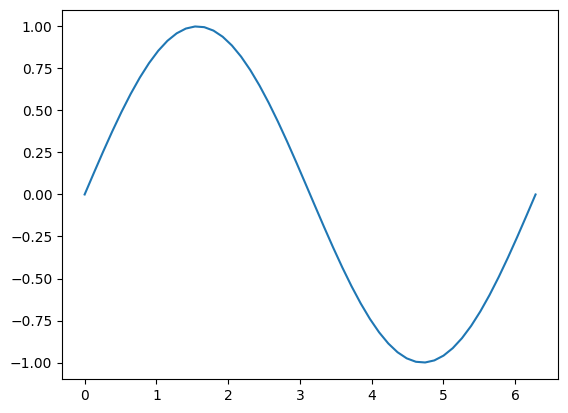

In [18]:
# Create each of the items
test_string = "This is a pickle example"
test_list = ["A", "B", "C", "D"]
test_pandas = pd.DataFrame({"Col1": [1,2,3], "Col2":[-1,-2,-3], "Col3": [0,0,0]})
test_fig = plt.figure()
x = np.linspace(0,2*np.pi)
y = np.sin(x)
plt.plot(x,y)

# Create the dictionary
dictionary_to_save = {
    "my_string": test_string,
    "my_list": test_list,
    "my_pandas": test_pandas,
    "my_figure": test_fig
}

In [19]:
# Pickle the dictionary into a file
with open('sample_output/example_pickle.pickle', 'wb') as file:  # The 'w' is for 'write', and 'b' for binary (not )
    pickle.dump(dictionary_to_save,file)

In [20]:
# Read in the pickle file
with open('sample_output/example_pickle.pickle', 'rb') as file:  # The 'r' is for 'read', and 'b' for binary (not )
    loaded_pickle = pickle.load(file)
    
# Check the file
loaded_pickle

{'my_string': 'This is a pickle example',
 'my_list': ['A', 'B', 'C', 'D'],
 'my_pandas':    Col1  Col2  Col3
 0     1    -1     0
 1     2    -2     0
 2     3    -3     0,
 'my_figure': <Figure size 640x480 with 1 Axes>}

In [21]:
# To access the pandas dataframe
loaded_pickle['my_pandas']

,Col1,Col2,Col3
0,1,-1,0
1,2,-2,0
2,3,-3,0


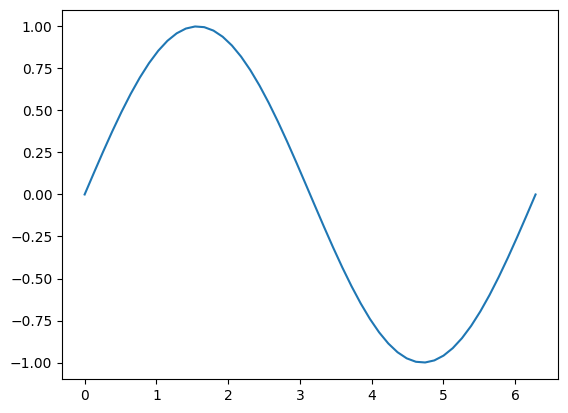

In [22]:
# To access the figure
loaded_pickle['my_figure']

# Tips and Tricks

This section provides some useful tips and tricks, along with re-usable functions (stored in the utilities folder)

## Get the latest file within a folder based on time-stamp

When data is frequently updated, you may want a function that automatically identifies the latest file. The following function does so -- you may need to adapt the logic for extracting the date from the file.

In [23]:
import glob, os, datetime
def get_latest_file(folder, file_ending = '.csv'):
    
    # This will hold the latest file
    latest_file = None
    latest_file_date = None
    found_files = glob.glob(f"{folder}/*{file_ending }")
    
    for filepath in found_files:
        
        filename = os.path.basename(filepath)
        
        # Get the date associated with the file. Tailor this logic!
        file_date = datetime.datetime.strptime(filename[:8], "%Y%m%d").date()
        
        if latest_file is None:
            latest_file = filepath
            latest_file_date = file_date
        elif file_date > latest_file_date:
            latest_file = filepath
            latest_file_date = file_date
    
    if latest_file is None:
        print("No file matching the extension was found")
    
    return latest_file.replace("\\", "/")

In [24]:
get_latest_file("sample_input/csv_folder_1/", file_ending = "file.csv")

'sample_input/csv_folder_1/20230425_sample_file.csv'

## Selecting which characters that pandas should detect as Missing

pandas automatically detects the following values as missing: ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘None’, ‘n/a’, ‘nan’, ‘null’
    
You can choose to add additional strings to be detected as missing by specifying the argument 'na_values'
    
You can also choose to ignore the default choices for the missing values above, by setting 'keep_default_na = False'
    
If you specify the argument 'na_filter = False' then pandas will not detect any NAs at all in your data. If you know you don't have missing data, doing this can speed up the load (especially for very large files)
    
Read more here: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

## Using dtype and parse_dates to specify data type of each column

By specifying a dictionary for dtype where the key is the column name and the value is the data type, we can tell pandas how to interpret the data fields. You can choose to specify this for a subset of columns.

For dates, 


In [25]:
# Without dtype
pd.read_csv("sample_input/dtype_test_file.csv").head()

,A,B,C,D,E,F
0,48,159.0,center,Drive baby eight.,2023-04-17,8/13/22 6:47 AM
1,69,870.0,bed,Someone truth at.,2022-11-30,9/6/22 10:36 PM
2,88,NaN,they,NaN,2022-11-18,4/21/23 1:40 PM
3,44,360.0,energy,Also summer.,2022-08-02,6/11/23 8:49 PM
4,47,295.0,operation,Option set along.,2023-06-18,12/24/22 3:19 AM


In [26]:
pd.read_csv("sample_input/dtype_test_file.csv", dtype = {'A': float}, parse_dates=['F'], date_format="%m/%d/%y %I:%M %p").head()

,A,B,C,D,E,F
0,48.0,159.0,center,Drive baby eight.,2023-04-17,2022-08-13 06:47:00
1,69.0,870.0,bed,Someone truth at.,2022-11-30,2022-09-06 22:36:00
2,88.0,NaN,they,NaN,2022-11-18,2023-04-21 13:40:00
3,44.0,360.0,energy,Also summer.,2022-08-02,2023-06-11 20:49:00
4,47.0,295.0,operation,Option set along.,2023-06-18,2022-12-24 03:19:00


## Using dtype = object to avoid any data casting by pandas

Use along with na_filter=False to preserve data

In [27]:
pd.read_csv("sample_input/dtype_test_file.csv", dtype = object, na_filter = False).head()

,A,B,C,D,E,F
0,48,159,center,Drive baby eight.,2023-04-17,8/13/22 6:47 AM
1,69,870,bed,Someone truth at.,2022-11-30,9/6/22 10:36 PM
2,88,,they,,2022-11-18,4/21/23 1:40 PM
3,44,360,energy,Also summer.,2022-08-02,6/11/23 8:49 PM
4,47,295,operation,Option set along.,2023-06-18,12/24/22 3:19 AM


## Reading csv from URLs

You can pass a URL to pd.read_csv. For many URL requests however, you need to pass a header along with the request, and you can do so with the 'storage options' argument.

For more advanced ways of scraping / fetching data from the web, see the web scraping templates from Gryphon.

In [28]:
URL = 'https://www.theice.com/publicdocs/clear_europe/irmParameters/harmonized/ENERGY_MARGIN_SCANNING_20230426.CSV'
read_table = pd.read_csv(URL, storage_options = {'User-Agent': 'Mozilla/5.0'})
read_table.head()

,Effective Date,Exchange Code,Logical Commodity Code,Physical Commodity Code,Contract Name,Currency,New Scanning Range,Previous Scanning Range,New Applied Margin Rate,Previous Applied Margin Rate,...,Previous Volatility Down Shift,New Short Option Minimum,Margin Units,Multiplier,Market,Asset Class,Sector,Spread Reference Product,Position Allocation,Margin Erosion
0,18-APR-23,I,14X,NaN,14X-USAC HSFO (Platts) Future,USD,6665.0,6659.0,5617.2620,5700.7699,...,NaN,1,Lots,1000.0,IFED,Oil,Oil,14X,No,Linear
1,18-APR-23,I,14X,NaN,14X-USAC HSFO (Platts) Future,USD,6665.0,6659.0,6665.0000,6659.0000,...,NaN,1,Lots,1000.0,IFED,Oil,Oil,14X,No,Linear
2,18-APR-23,I,14X,NaN,14X-USAC HSFO (Platts) Future,USD,6665.0,6659.0,6348.4125,6350.6883,...,NaN,1,Lots,1000.0,IFED,Oil,Oil,14X,No,Linear
3,18-APR-23,I,14X,NaN,14X-USAC HSFO (Platts) Future,USD,6665.0,6659.0,5743.2305,5780.6779,...,NaN,1,Lots,1000.0,IFED,Oil,Oil,14X,No,Linear
4,18-APR-23,I,14X,NaN,14X-USAC HSFO (Platts) Future,USD,6665.0,6659.0,5347.3295,5439.0712,...,NaN,1,Lots,1000.0,IFED,Oil,Oil,14X,No,Linear


## Reading tables from HTML

You can use pandas to find tables on a HTML website using pd.read_html. For more examples, see the web scraping templates from Gryphon.

In [29]:
URL = "https://en.wikipedia.org/wiki/Cricket_World_Cup"
tables = pd.read_html(URL)
tables[0]

,0,1
0,Cricket World Cup Trophy,Cricket World Cup Trophy
1,Administrator,International Cricket Council (ICC)
2,Format,One Day International
3,First edition,1975 England
4,Latest edition,2019 England & Wales
5,Next edition,2023 India
6,Tournament format,↓various
7,Number of teams,10 [1] (14 from 2027)
8,Current champion,England (1st title)
9,Most successful,Australia (5 titles)
